## Final Project Submission

Please fill out:
* Student name: Victor Keya
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Noah Kandie
* Blog post URL:


# Your code here - remember to use markdown cells for comments as well!






# 1. Introduction


####  The Business case will be based on analysis to show which Movie Genres have been highly rated and popular over the last decade. I will also analyse the influence Directors who have been involved in these movies have contributed to the movies being popular and highly rated.

# 2. Importing libraries and Loading Data


In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.1 Open the file with Pandas csv library.

#### This file is from imdb(movie database), it consists of 6 columns, tconst is used to identify specific movie titles, nconst identifies unique people, could be a producer, director, actor or actress

In [2]:
path = (r'C:\Users\Victor Keya\Documents\Flatiron\dsc-phase-1-project\dsc-phase-1-project\zippedData\imdb.title.principals.csv.gz')
df = pd.read_csv(path)
df

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


#### Check the Dataset properties

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


#### The above table has 1028186 rows, the main columns of use are tconst(which gives a unique id for the movie and the nconst which uniquely identifies the category) 



#### The below Dataset is also from imdb movie database, it has the nconst column with another matching column of names.

#### This will be merged to the previous dataset(df) using the nconst column.

In [4]:
path = (r'C:\Users\Victor Keya\Documents\Flatiron\dsc-phase-1-project\dsc-phase-1-project\zippedData\imdb.name.basics.csv.gz')
df1 = pd.read_csv(path)
df1

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


#### Check the Dataset properties

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


#### df1 has 606648 rows, it has the unique name category which i want to use, so i will merge the 2 tables with the nconst column

In [6]:
merged_df = pd.merge(df, df1, on='nconst', how='inner')
merged_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,Phillippe Warner,NaN,NaN,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,Xavi Herrero,NaN,NaN,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


#### Cleaning the merged_df by dropping some columns i dont need to reduce on column size and only remain with relevant columns

In [7]:
merged_df = merged_df.drop(columns= ['birth_year', 'death_year', 'primary_profession', 'job', 'ordering', 'known_for_titles', 'characters'])

#### Check dataset shape and basic information

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027912 entries, 0 to 1027911
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   tconst        1027912 non-null  object
 1   nconst        1027912 non-null  object
 2   category      1027912 non-null  object
 3   primary_name  1027912 non-null  object
dtypes: object(4)
memory usage: 39.2+ MB


In [9]:
merged_df.head()

,tconst,nconst,category,primary_name
0,tt0111414,nm0246005,actor,Tommy Dysart
1,tt0111414,nm0398271,director,Frank Howson
2,tt5573596,nm0398271,director,Frank Howson
3,tt0111414,nm3739909,producer,Barry Porter-Robinson
4,tt0323808,nm0059247,editor,Sean Barton


In [10]:
merged_df.tail()

,tconst,nconst,category,primary_name
1027907,tt9689618,nm10439724,actor,Phillippe Warner
1027908,tt9689618,nm10439725,director,Xavi Herrero
1027909,tt9692684,nm10441594,director,Guy Jones
1027910,tt9692684,nm6009913,writer,Sabrina Mahfouz
1027911,tt9692684,nm10441595,producer,Simmer Dim


#### Now to merge with a table that has the movie titles

In [11]:
path = (r'C:\Users\Victor Keya\Documents\Flatiron\dsc-phase-1-project\dsc-phase-1-project\zippedData\imdb.title.akas.csv.gz')
df2 = pd.read_csv(path)
df2

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


# 3. Data Inspection and Cleaning

#### Renaming column('title_id') to column('tconst') to use this column to merge the two datasets and use the movie title column to merge

In [13]:
df2 = df2.rename(columns={'title_id': 'tconst'})
df2.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


#### Merge the 2 datasets

In [14]:
merged_df = pd.merge(merged_df, df2, on='tconst', how='inner')
merged_df.head()

,tconst,nconst,category,primary_name,ordering,title,region,language,types,attributes,is_original_title
0,tt0111414,nm0246005,actor,Tommy Dysart,1,A Thin Life,AU,NaN,NaN,NaN,0.0
1,tt0111414,nm0398271,director,Frank Howson,1,A Thin Life,AU,NaN,NaN,NaN,0.0
2,tt0111414,nm3739909,producer,Barry Porter-Robinson,1,A Thin Life,AU,NaN,NaN,NaN,0.0
3,tt5573596,nm0398271,director,Frank Howson,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0
4,tt5573596,nm0000476,actress,Sally Kirkland,1,Remembering Nigel,AU,NaN,NaN,NaN,0.0


#### Drop unnecessary columns from the new merged dataset.

In [15]:
merged_df = merged_df.drop(columns= ['types', 'attributes', 'is_original_title', 'ordering'])
merged_df.head()

,tconst,nconst,category,primary_name,title,region,language
0,tt0111414,nm0246005,actor,Tommy Dysart,A Thin Life,AU,NaN
1,tt0111414,nm0398271,director,Frank Howson,A Thin Life,AU,NaN
2,tt0111414,nm3739909,producer,Barry Porter-Robinson,A Thin Life,AU,NaN
3,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,NaN
4,tt5573596,nm0000476,actress,Sally Kirkland,Remembering Nigel,AU,NaN


#### Need to merge with another dataset that has the genre column for the specific movie titles. Also need to add the year the film was released

In [16]:
path = (r'C:\Users\Victor Keya\Documents\Flatiron\dsc-phase-1-project\dsc-phase-1-project\zippedData\imdb.title.basics.csv.gz')
df3 = pd.read_csv(path)
df3

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


#### Merging using the tconst column

In [17]:
merged_df = pd.merge(merged_df, df3, on='tconst', how='inner')
merged_df

,tconst,nconst,category,primary_name,title,region,language,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0111414,nm0246005,actor,Tommy Dysart,A Thin Life,AU,NaN,A Thin Life,A Thin Life,2018,75.0,Comedy
1,tt0111414,nm0398271,director,Frank Howson,A Thin Life,AU,NaN,A Thin Life,A Thin Life,2018,75.0,Comedy
2,tt0111414,nm3739909,producer,Barry Porter-Robinson,A Thin Life,AU,NaN,A Thin Life,A Thin Life,2018,75.0,Comedy
3,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,NaN,Remembering Nigel,Remembering Nigel,2015,NaN,Comedy
4,tt5573596,nm0000476,actress,Sally Kirkland,Remembering Nigel,AU,NaN,Remembering Nigel,Remembering Nigel,2015,NaN,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
2839858,tt9183176,nm9245626,writer,Wesley Davies,Kroeger Club,XWW,en,Don of the Damned,Don of the Damned,2018,198.0,"Action,Comedy,Crime"
2839859,tt9183176,nm9245633,producer,Kiersten Muse,Don of the Damned,NaN,NaN,Don of the Damned,Don of the Damned,2018,198.0,"Action,Comedy,Crime"
2839860,tt9183176,nm9245633,producer,Kiersten Muse,Kroeger Club,XWW,en,Don of the Damned,Don of the Damned,2018,198.0,"Action,Comedy,Crime"
2839861,tt9183176,nm9245634,producer,Stephen Weinstock,Don of the Damned,NaN,NaN,Don of the Damned,Don of the Damned,2018,198.0,"Action,Comedy,Crime"


#### Drop unnecessary columns from the New Merged dataset

In [18]:
merged_df = merged_df.drop(columns= ['language', 'primary_title', 'runtime_minutes'])
merged_df

,tconst,nconst,category,primary_name,title,region,original_title,start_year,genres
0,tt0111414,nm0246005,actor,Tommy Dysart,A Thin Life,AU,A Thin Life,2018,Comedy
1,tt0111414,nm0398271,director,Frank Howson,A Thin Life,AU,A Thin Life,2018,Comedy
2,tt0111414,nm3739909,producer,Barry Porter-Robinson,A Thin Life,AU,A Thin Life,2018,Comedy
3,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,Remembering Nigel,2015,Comedy
4,tt5573596,nm0000476,actress,Sally Kirkland,Remembering Nigel,AU,Remembering Nigel,2015,Comedy
...,...,...,...,...,...,...,...,...,...
2839858,tt9183176,nm9245626,writer,Wesley Davies,Kroeger Club,XWW,Don of the Damned,2018,"Action,Comedy,Crime"
2839859,tt9183176,nm9245633,producer,Kiersten Muse,Don of the Damned,NaN,Don of the Damned,2018,"Action,Comedy,Crime"
2839860,tt9183176,nm9245633,producer,Kiersten Muse,Kroeger Club,XWW,Don of the Damned,2018,"Action,Comedy,Crime"
2839861,tt9183176,nm9245634,producer,Stephen Weinstock,Don of the Damned,NaN,Don of the Damned,2018,"Action,Comedy,Crime"


#### To add the column for movie revenue for both domesctic and foreign gross revenue

In [19]:
path = (r'C:\Users\Victor Keya\Documents\Flatiron\dsc-phase-1-project\dsc-phase-1-project\zippedData\imdb.title.ratings.csv.gz')
df4 = pd.read_csv(path)
df4

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


#### Merging this new dataset with existing merged_df using the unique tconst column

In [20]:
merged_df = pd.merge(merged_df, df4, on='tconst', how='inner')
merged_df


,tconst,nconst,category,primary_name,title,region,original_title,start_year,genres,averagerating,numvotes
0,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
1,tt5573596,nm0000476,actress,Sally Kirkland,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
2,tt5573596,nm0001445,actor,Martin Landau,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
3,tt5573596,nm0000925,actor,Steven Berkoff,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
4,tt5573596,nm0121007,actor,Eric Burdon,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt7573790,nm9547216,self,Rafal Zaremba,Wszystko z nami w porządku,PL,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422862,tt7573790,nm9547216,self,Rafal Zaremba,Wszystko z nami w porzadku,NaN,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422863,tt7573790,nm9547216,self,Rafal Zaremba,Мы в порядке,RU,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422864,tt7573790,nm9547216,self,Rafal Zaremba,We are alright,US,Wszystko z nami w porzadku,2018,Documentary,8.0,10


#### Check for duplicates

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422866 entries, 0 to 2422865
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   nconst          object 
 2   category        object 
 3   primary_name    object 
 4   title           object 
 5   region          object 
 6   original_title  object 
 7   start_year      int64  
 8   genres          object 
 9   averagerating   float64
 10  numvotes        int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 221.8+ MB


#### Remove duplicates from the New Merged_df dataset

In [22]:
merged_df.duplicated().sum()

5963

#### The data has 5963 duplicates, removing duplicates

In [23]:
merged_df = merged_df.drop_duplicates()

In [24]:
merged_df

,tconst,nconst,category,primary_name,title,region,original_title,start_year,genres,averagerating,numvotes
0,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
1,tt5573596,nm0000476,actress,Sally Kirkland,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
2,tt5573596,nm0001445,actor,Martin Landau,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
3,tt5573596,nm0000925,actor,Steven Berkoff,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
4,tt5573596,nm0121007,actor,Eric Burdon,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt7573790,nm9547216,self,Rafal Zaremba,Wszystko z nami w porządku,PL,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422862,tt7573790,nm9547216,self,Rafal Zaremba,Wszystko z nami w porzadku,NaN,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422863,tt7573790,nm9547216,self,Rafal Zaremba,Мы в порядке,RU,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422864,tt7573790,nm9547216,self,Rafal Zaremba,We are alright,US,Wszystko z nami w porzadku,2018,Documentary,8.0,10


#### Check if we still have duplicates

In [25]:
merged_df.duplicated().sum()

0

#### Check for missing values in the DataFrame

In [26]:
merged_df.isna().sum()

tconst                 0
nconst                 0
category               0
primary_name           0
title                  0
region            393726
original_title         0
start_year             0
genres              9009
averagerating          0
numvotes               0
dtype: int64

#### Check percentage of missing values in this Dataset

In [27]:
merged_df.isna().mean()

tconst            0.000000
nconst            0.000000
category          0.000000
primary_name      0.000000
title             0.000000
region            0.162905
original_title    0.000000
start_year        0.000000
genres            0.003727
averagerating     0.000000
numvotes          0.000000
dtype: float64

#### Looking at region column which has 17% missing data compared to the whole dataset, which is a small percentage as compared to the whole dataset, so i will drop all missing values

In [28]:
merged_df = merged_df.dropna()
merged_df

,tconst,nconst,category,primary_name,title,region,original_title,start_year,genres,averagerating,numvotes
0,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
1,tt5573596,nm0000476,actress,Sally Kirkland,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
2,tt5573596,nm0001445,actor,Martin Landau,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
3,tt5573596,nm0000925,actor,Steven Berkoff,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
4,tt5573596,nm0121007,actor,Eric Burdon,Remembering Nigel,AU,Remembering Nigel,2015,Comedy,7.8,6
...,...,...,...,...,...,...,...,...,...,...,...
2422860,tt7573790,nm9382087,composer,Maciej Zakrzewski,We Are Alright,XWW,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422861,tt7573790,nm9547216,self,Rafal Zaremba,Wszystko z nami w porządku,PL,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422863,tt7573790,nm9547216,self,Rafal Zaremba,Мы в порядке,RU,Wszystko z nami w porzadku,2018,Documentary,8.0,10
2422864,tt7573790,nm9547216,self,Rafal Zaremba,We are alright,US,Wszystko z nami w porzadku,2018,Documentary,8.0,10


#### Checking if we still have missing values

In [29]:
merged_df.isna().sum()

tconst            0
nconst            0
category          0
primary_name      0
title             0
region            0
original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

#### Dropping additional columns from the new dataset

In [30]:
merged_df = merged_df.drop(columns= ['original_title'])


### Check statistical analysis of the dataset.

In [31]:
merged_df.describe()

,start_year,averagerating,numvotes
count,2.016003e+06,2.016003e+06,2.016003e+06
mean,2.014040e+03,6.259004e+00,3.573484e+04
std,2.570389e+00,1.212103e+00,1.048812e+05
min,2.010000e+03,1.000000e+00,5.000000e+00
25%,2.012000e+03,5.600000e+00,1.150000e+02
50%,2.014000e+03,6.400000e+00,1.191000e+03
75%,2.016000e+03,7.100000e+00,1.468000e+04
max,2.019000e+03,1.000000e+01,1.841066e+06


# 4. Feature Engineering


#### Create a new column called rating with rating levels

#### Come up with conditions and values and use the np.select then parse in the condition and value arguments

In [32]:
conditions = [
    (merged_df['averagerating'] <= 1.0),
    (merged_df['averagerating'] <= 2.0),
    (merged_df['averagerating'] <= 3.0),
    (merged_df['averagerating'] <= 4.0),
    (merged_df['averagerating'] <= 5.0),
    (merged_df['averagerating'] <= 6.0),
    (merged_df['averagerating'] <= 7.0),
    (merged_df['averagerating'] <= 8.0),
    (merged_df['averagerating'] <= 9.0),
    (merged_df['averagerating'] <= 10.0)
]

values = ['awful', 'very_bad', 'bad', 'poor', 'average', 'fair', 'good', 'very_good', 'excellent', 'masterpiece']

merged_df['rating'] = np.select(conditions, values)

In [33]:
merged_df.head(10)


,tconst,nconst,category,primary_name,title,region,start_year,genres,averagerating,numvotes,rating
0,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
1,tt5573596,nm0000476,actress,Sally Kirkland,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
2,tt5573596,nm0001445,actor,Martin Landau,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
3,tt5573596,nm0000925,actor,Steven Berkoff,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
4,tt5573596,nm0121007,actor,Eric Burdon,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
5,tt5573596,nm2105556,actor,Tait Brady,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
6,tt5573596,nm1852081,producer,J. Marshall Craig,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
7,tt0323808,nm0059247,editor,Sean Barton,May Day,GB,2011,"Drama,Horror",3.9,2328,poor
8,tt0323808,nm0059247,editor,Sean Barton,Cowboys for Christ,GB,2011,"Drama,Horror",3.9,2328,poor
9,tt0323808,nm0059247,editor,Sean Barton,The Wicker Tree,GB,2011,"Drama,Horror",3.9,2328,poor


#### Capitalize the column names, running a list comprehension to iterate the column names and capitalize them, then renaming the columns using the capitalized column names

In [34]:
column_mapping = {col: col.capitalize() for col in merged_df.columns}
merged_df = merged_df.rename(columns=column_mapping)
merged_df.head(20)

,Tconst,Nconst,Category,Primary_name,Title,Region,Start_year,Genres,Averagerating,Numvotes,Rating
0,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
1,tt5573596,nm0000476,actress,Sally Kirkland,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
2,tt5573596,nm0001445,actor,Martin Landau,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
3,tt5573596,nm0000925,actor,Steven Berkoff,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
4,tt5573596,nm0121007,actor,Eric Burdon,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
5,tt5573596,nm2105556,actor,Tait Brady,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
6,tt5573596,nm1852081,producer,J. Marshall Craig,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
7,tt0323808,nm0059247,editor,Sean Barton,May Day,GB,2011,"Drama,Horror",3.9,2328,poor
8,tt0323808,nm0059247,editor,Sean Barton,Cowboys for Christ,GB,2011,"Drama,Horror",3.9,2328,poor
9,tt0323808,nm0059247,editor,Sean Barton,The Wicker Tree,GB,2011,"Drama,Horror",3.9,2328,poor


#### Filter out category column to only remain with Director

In [35]:
merged_df = merged_df[merged_df['Category'] == 'director']
merged_df


,Tconst,Nconst,Category,Primary_name,Title,Region,Start_year,Genres,Averagerating,Numvotes,Rating
0,tt5573596,nm0398271,director,Frank Howson,Remembering Nigel,AU,2015,Comedy,7.8,6,very_good
42,tt0323808,nm0362736,director,Robin Hardy,May Day,GB,2011,"Drama,Horror",3.9,2328,poor
43,tt0323808,nm0362736,director,Robin Hardy,Cowboys for Christ,GB,2011,"Drama,Horror",3.9,2328,poor
44,tt0323808,nm0362736,director,Robin Hardy,The Wicker Tree,GB,2011,"Drama,Horror",3.9,2328,poor
46,tt0323808,nm0362736,director,Robin Hardy,Плетеное дерево,RU,2011,"Drama,Horror",3.9,2328,poor
...,...,...,...,...,...,...,...,...,...,...,...
2422830,tt6898474,nm7206798,director,Elliot Spencer,Liborio,SB,2018,Documentary,9.4,9,masterpiece
2422851,tt7573790,nm9232479,director,Borys Niespielak,Wszystko z nami w porządku,PL,2018,Documentary,8.0,10,very_good
2422853,tt7573790,nm9232479,director,Borys Niespielak,Мы в порядке,RU,2018,Documentary,8.0,10,very_good
2422854,tt7573790,nm9232479,director,Borys Niespielak,We are alright,US,2018,Documentary,8.0,10,very_good


In [38]:
merged_df['Title'].value_counts()

Vaiana                                            44
Ballerina                                         42
Happy Feet 2                                      39
Coco                                              38
Miss Hokusai                                      36
                                                  ..
Billy the Kid                                      1
Tomb Raider: Лара Крофт                            1
AnoHana: Die Blume, die wir an jenem Tag sahen     1
Kawoonteudawoon                                    1
The Night of the Prophet                           1
Name: Title, Length: 175423, dtype: int64

# 5. Exploratory Data Analysis

## 5.1. Univariate Analysis

### 5.1.1 Genre Distribution: Analyze the distribution of movies across different genres.

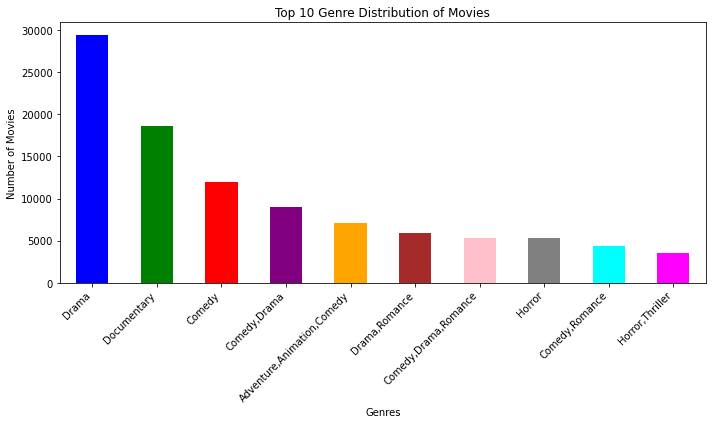

In [39]:
# Split the 'Genres' column by comma and create a list of genres
genres_list = merged_df['Genres'].str.split(', ')

# Flatten the list of lists into a single list of genres
all_genres = [genre for sublist in genres_list for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Select the top 10 genres
top_10_genres = genre_counts.head(10)

# Define a list of colors for the top 10 genres
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot the distribution of the top 10 genres
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color= colors)
plt.title('Top 10 Genre Distribution of Movies')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### From the above distribution, it is clear that the Drama Genre is the most produced Movie genre in this dataset, the other popular genre is Documentary, this clearly shows that most people tend to look for these genres as a means of entertainment.

### 5.1.2 Average Rating Distribution: Explore the distribution of average ratings for all movies.

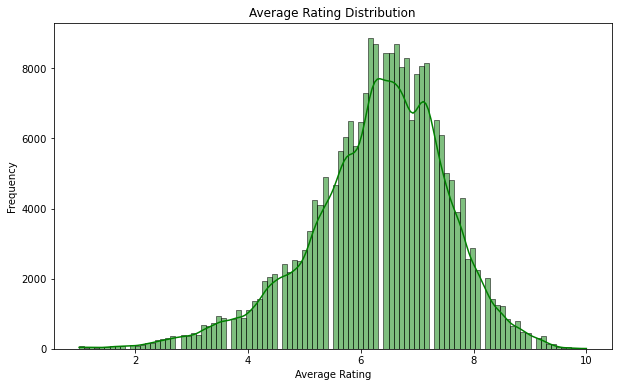

In [40]:
## Average Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Averagerating', bins=100, kde=True, color='green')
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

### 5.1.3. Rating Distribution: Understand the distribution of movie ratings for this dataset.

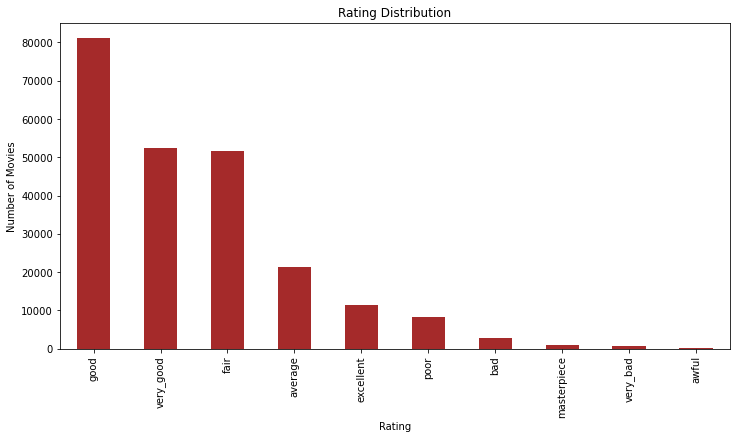

In [41]:
# Plot the distribution of ratings assigned to movies
plt.figure(figsize=(12, 6))
merged_df['Rating'].value_counts().plot(kind='bar', color='brown')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

#### We see most movies being rated as good, very good and fair

### 5.1.4 Release Year Distribution: Understand how many movies were being released each year over a 10 year period.

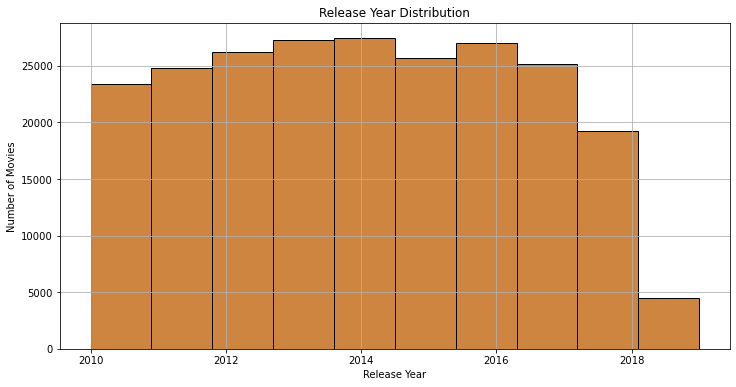

In [42]:

# Plot the distribution of movies based on their release years
plt.figure(figsize=(12, 6))
merged_df['Start_year'].hist(bins=10, color='peru', edgecolor='black')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

#### Understanding movie distribution over the years, significant rise from the year 2010 till 2016. This could be due to rise in popular VOD channels like Netflix.

## 5.2. Bivariate Analysis

### 5.2.1 Relationship between Genre and Average Rating: using a box plot to show how the genre of a movie relates to its average rating.

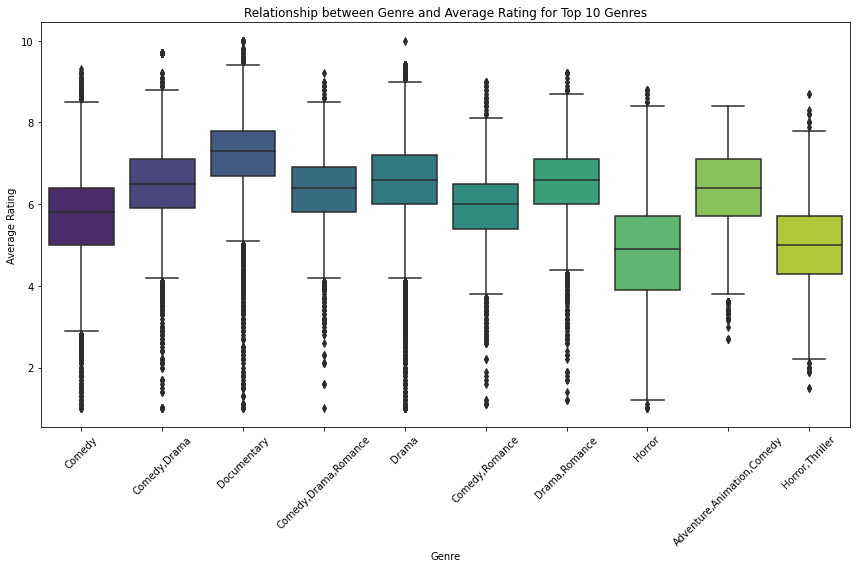

In [43]:
## Relationship between Genre and Average Rating

top_10_genres = merged_df['Genres'].value_counts().nlargest(10).index
# Filter the DataFrame to include only movies with genres in the top 10
movies_top_10_genres = merged_df[merged_df['Genres'].isin(top_10_genres)]

# Create a box plot to show the relationship between genre and average rating
plt.figure(figsize=(12, 8))
sns.boxplot(data=movies_top_10_genres, x='Genres', y='Averagerating', palette='viridis')
plt.title('Relationship between Genre and Average Rating for Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### We can see on the above box plot, for the highly popular genres like drama, documentary and Drama, comedy clearly show the average rating is significantly higher compared to the other genres



### 5.2.2 Director's Influence on Ratings: Calculate the average rating for each director and visualize it using a bar plot.

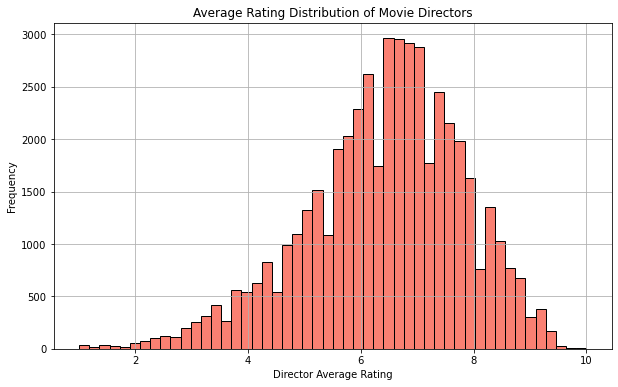

In [44]:
# Group the DataFrame by director and calculate the mean of 'Averagerating'
rating_per_director = merged_df.groupby('Primary_name')['Averagerating'].mean()

# Plot a histogram for the average rating distribution of movies directed by the top 10 directors
plt.figure(figsize=(10, 6))
plt.hist(rating_per_director, bins=50, color='salmon', edgecolor='black')
plt.title('Average Rating Distribution of Movie Directors')
plt.xlabel('Director Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 5.2.3 Genre vs. Rating: Average ratings for different genres.

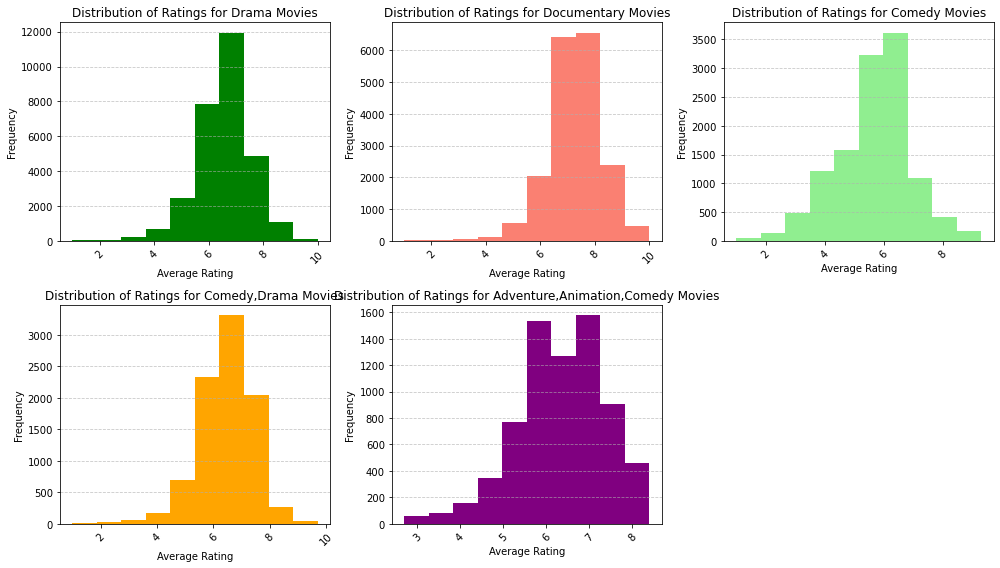

In [45]:
# Select the top 5 genres based on their overall frequency
top_5_genres = merged_df['Genres'].value_counts().nlargest(5).index

# Filter the DataFrame for movies with the top 5 genres
top_5_df = merged_df[merged_df['Genres'].isin(top_5_genres)]

# Define colors for each genre
colors = ['green', 'salmon', 'lightgreen', 'orange', 'purple']

# Plot histograms of ratings for movies with the top 5 genres
plt.figure(figsize=(14, 8))
for i, (genre, color) in enumerate(zip(top_5_genres, colors), start=1):
    plt.subplot(2, 3, i)
    genre_df = top_5_df[top_5_df['Genres'] == genre]
    plt.hist(genre_df['Averagerating'], bins=10, color=color)
    plt.title(f'Distribution of Ratings for {genre} Movies')
    plt.xlabel('Average Rating')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### We clearly can see the top 5 genre rating distribution shows that most are rated between 6(fair), 7(good) and 8(very good)

### 5.2.4 Directors influence on number of votes a movie gets

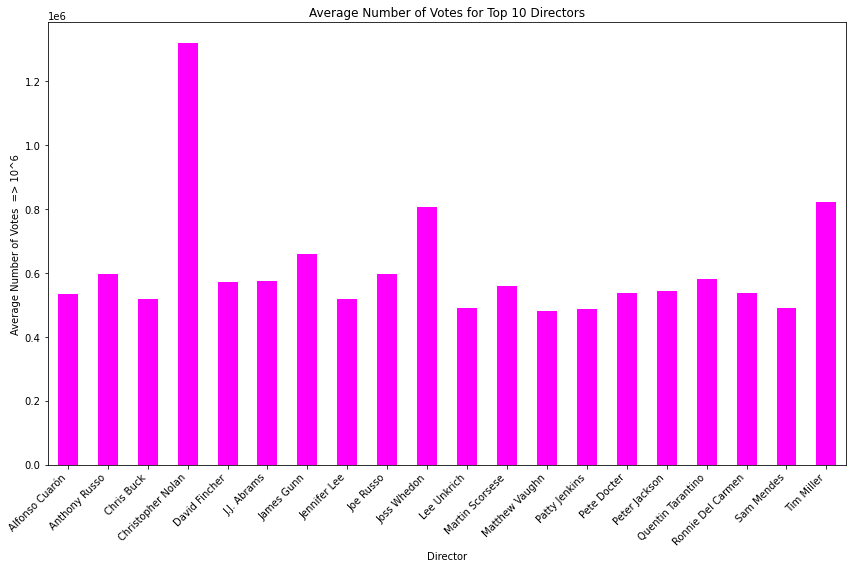

In [46]:
# Group the DataFrame by director and calculate the mean of 'Numvotes'
average_votes_per_director = merged_df.groupby('Primary_name')['Numvotes'].mean()

# Select the top 10 directors with the highest average number of votes
top_10_directors = average_votes_per_director.nlargest(20)

# Filter the DataFrame to include only the movies directed by the top 10 directors
filtered_df = merged_df[merged_df['Primary_name'].isin(top_10_directors.index)]

# Plot the average number of votes for each director
plt.figure(figsize=(12, 8))
filtered_df.groupby('Primary_name')['Numvotes'].mean().plot(kind='bar', color='magenta')
plt.title('Average Number of Votes for Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Average Number of Votes  => 10^6')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### When we analyse the influence a director has on the number of votes a movie gets we can clearly come up with a list of highly rated directors who are able to influence the rating a movie gets if it shows it was produced by them.

### 5.2.5 Analysis of Top 10 Movie Directors by Numvotes againts their average ratings.

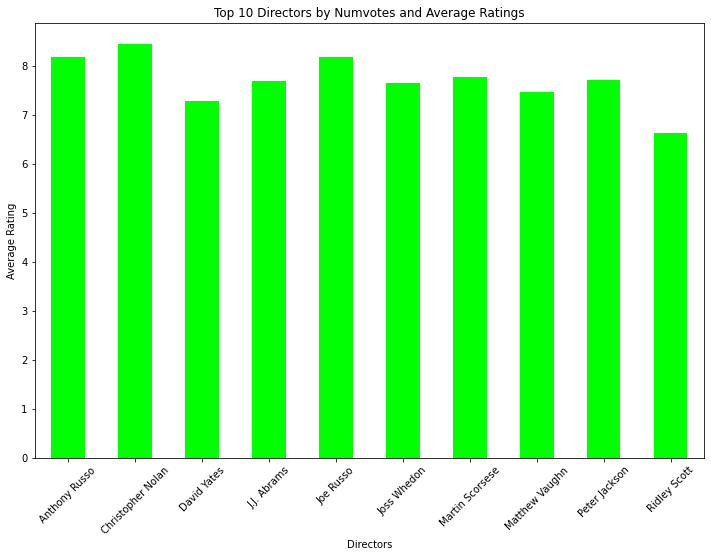

In [47]:
# Group by director and sum the numvotes
directors_votes = merged_df.groupby('Primary_name')['Numvotes'].sum()

# Sort directors by sum of numvotes in descending order and select top 5
top_10_directors = directors_votes.nlargest(10)

# Filter the original DataFrame to include only the top 5 directors
top_10_directors_df = merged_df[merged_df['Primary_name'].isin(top_10_directors.index)]

# Group by director and calculate the average rating
average_ratings = top_10_directors_df.groupby('Primary_name')['Averagerating'].mean()

# Plot the graph
plt.figure(figsize=(12, 8))
average_ratings.plot(kind='bar', color='lime')
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Numvotes and Average Ratings')
plt.xticks(rotation=45)
plt.show()

#### Once we understand director influence on number of votes, we can get the top 10 from that list and try to understand if their average rating also matches their higher number of votes, and we can clearly see that all of them have very high average ratings which further shows us that a Director can influence the popularity, number of votes and rating of a movie.

### 5.2.6 Genre Trends: Identify trends in genre popularity over time.

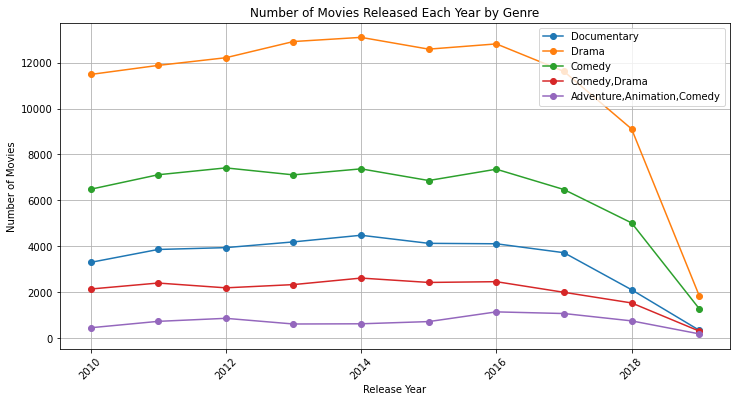

In [48]:
# Convert 'Start_year' column to numeric
merged_df['Start_year'] = pd.to_numeric(merged_df['Start_year'], errors='coerce')

# Define genres of interest
genres_of_interest = ['Documentary', 'Drama', 'Comedy', 'Comedy,Drama', 'Adventure,Animation,Comedy']

# Initialize a dictionary to store counts for each genre
genre_counts_by_year = {}

# Iterate over each genre
for genre in genres_of_interest:
    # Filter the DataFrame to include only movies with the current genre
    genre_df = merged_df[merged_df['Genres'].str.contains(genre)]
    
    # Group by release year and count the number of movies released each year
    genre_counts_by_year[genre] = genre_df.groupby('Start_year').size()

# Plot the line graph
plt.figure(figsize=(12, 6))

# Plot each genre
for genre, counts_by_year in genre_counts_by_year.items():
    plt.plot(counts_by_year.index, counts_by_year.values, marker='o', linestyle='-', label=genre)

plt.title('Number of Movies Released Each Year by Genre')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### The line graph distribution of genres trends over time shows a clearly constant trend from 2010 to 2019, it was only affected  during the covid period where most productions were shut. Drama Movie production increased from the year 2010 showing popularity increase over time

### 5.2.7 To understand the directors involved with specific genres and their average rating.

### Directors in the Drama Genre

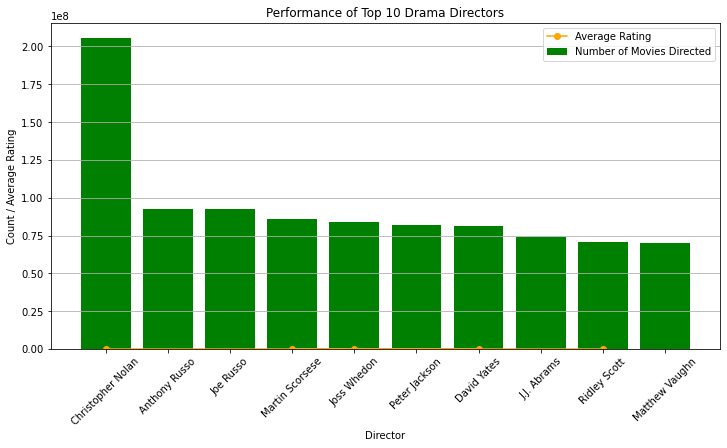

In [49]:
# Filter the DataFrame to include only movies with the Drama genre directed by the top 10 drama directors
drama_df = merged_df[(merged_df['Genres'].str.contains('Drama')) & (merged_df['Primary_name'].isin(top_10_directors.index))]

# Group by director and calculate the average rating for Drama genre movies directed by each director
director_avg_rating = drama_df.groupby('Primary_name')['Averagerating'].mean()

# Plot the bar graph
plt.figure(figsize=(12, 6))

# Plot number of drama movies directed
plt.bar(top_10_directors.index, top_10_directors.values, color='green', label='Number of Movies Directed')

# Plot average rating
plt.plot(director_avg_rating.index, director_avg_rating.values, marker='o', linestyle='-', color='orange', label='Average Rating')

plt.title('Performance of Top 10 Drama Directors')
plt.xlabel('Director')
plt.ylabel('Count / Average Rating')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

### Directors in the Documentary Genre

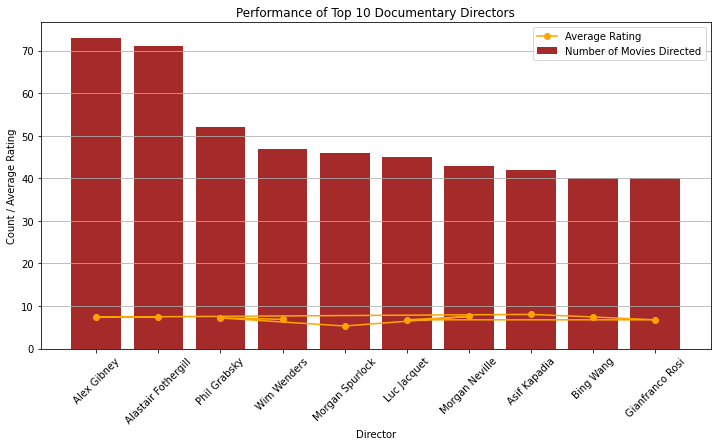

In [50]:
# Filter the DataFrame to include only movies with the Documentary genre
documentary_df = merged_df[merged_df['Genres'].str.contains('Documentary')]

# Group by director and count the number of Documentary genre movies directed by each director
director_counts = documentary_df.groupby('Primary_name').size()

# Sort directors by the number of Documentary genre movies directed in descending order and select top 10
top_10_directors = director_counts.nlargest(10)

# Filter the DataFrame to include only movies directed by the top 10 documentary directors
top_10_documentary_df = documentary_df[documentary_df['Primary_name'].isin(top_10_directors.index)]

# Group by director and calculate the average rating for Documentary genre movies directed by each director
director_avg_rating = top_10_documentary_df.groupby('Primary_name')['Averagerating'].mean()

# Plot the bar graph
plt.figure(figsize=(12, 6))

# Plot number of Documentary movies directed
plt.bar(top_10_directors.index, top_10_directors.values, color='brown', label='Number of Movies Directed')

# Plot average rating
plt.plot(director_avg_rating.index, director_avg_rating.values, marker='o', linestyle='-', color='orange', label='Average Rating')

plt.title('Performance of Top 10 Documentary Directors')
plt.xlabel('Director')
plt.ylabel('Count / Average Rating')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

### Directors in the Comedy Genre

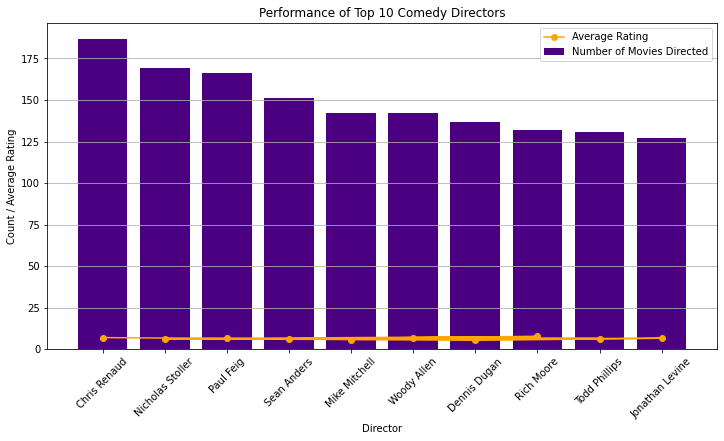

In [51]:
# Filter the DataFrame to include only movies with the Comedy genre
comedy_df = merged_df[merged_df['Genres'].str.contains('Comedy')]

# Group by director and count the number of Comedy genre movies directed by each director
director_counts = comedy_df.groupby('Primary_name').size()

# Sort directors by the number of Comedy genre movies directed in descending order and select top 10
top_10_directors = director_counts.nlargest(10)

# Filter the DataFrame to include only movies directed by the top 10 comedy directors
top_10_comedy_df = comedy_df[comedy_df['Primary_name'].isin(top_10_directors.index)]

# Group by director and calculate the average rating for Comedy genre movies directed by each director
director_avg_rating = top_10_comedy_df.groupby('Primary_name')['Averagerating'].mean()

# Plot the bar graph
plt.figure(figsize=(12, 6))

# Plot number of Comedy movies directed
plt.bar(top_10_directors.index, top_10_directors.values, color='indigo', label='Number of Movies Directed')

# Plot average rating
plt.plot(director_avg_rating.index, director_avg_rating.values, marker='o', linestyle='-', color='orange', label='Average Rating')

plt.title('Performance of Top 10 Comedy Directors')
plt.xlabel('Director')
plt.ylabel('Count / Average Rating')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

### 5.2.8 Top directors were identified based on the number of movies directed and average rating.

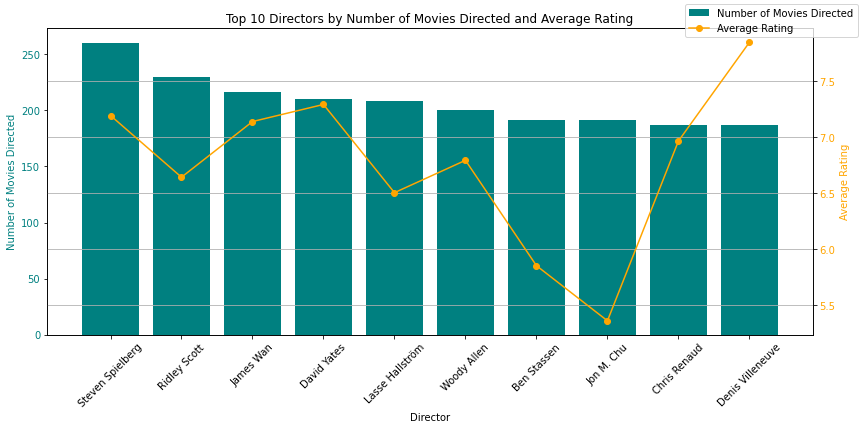

In [52]:
# Group by director and count the number of movies directed by each director
director_movie_counts = merged_df['Primary_name'].value_counts().head(10)

# Group by director and calculate the average rating for each director
director_avg_ratings = merged_df.groupby('Primary_name')['Averagerating'].mean().loc[director_movie_counts.index]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot number of movies directed
ax1.bar(director_movie_counts.index, director_movie_counts.values, color='teal', label='Number of Movies Directed')

# Set labels and tick parameters
ax1.set_xlabel('Director')
ax1.set_ylabel('Number of Movies Directed', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for average rating
ax2 = ax1.twinx()  
ax2.plot(director_avg_ratings.index, director_avg_ratings.values, marker='o', linestyle='-', color='orange', label='Average Rating')
ax2.set_ylabel('Average Rating', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend
fig.legend(loc='upper right')

plt.title('Top 10 Directors by Number of Movies Directed and Average Rating')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Directors with the highest average rating.

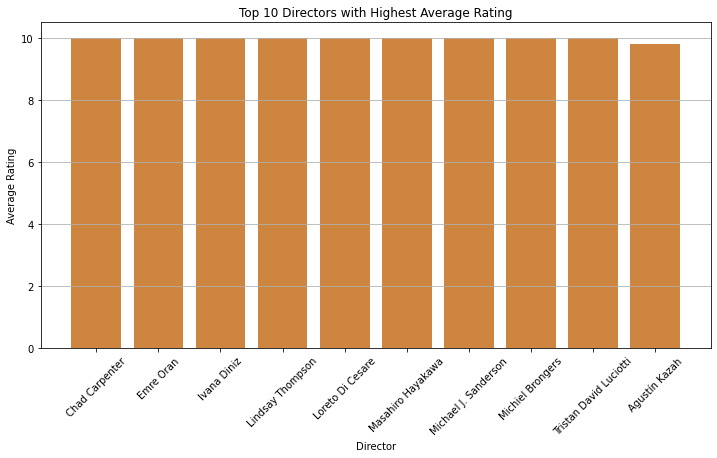

In [53]:
# Group by director and calculate the average rating for each director
director_avg_ratings = merged_df.groupby('Primary_name')['Averagerating'].mean().nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))

# Plot bar chart for top 10 directors with highest average rating
plt.bar(director_avg_ratings.index, director_avg_ratings.values, color='peru')

# Set labels and tick parameters
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors with Highest Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

### Average ratings vs start year

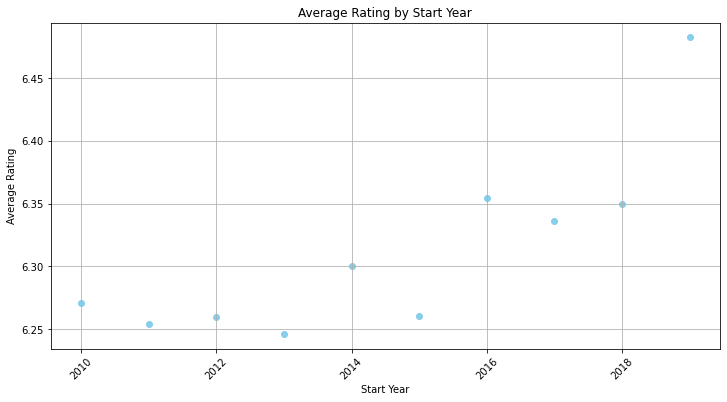

In [54]:

# Group by start year and calculate the average rating for each year
average_rating_by_year = merged_df.groupby('Start_year')['Averagerating'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot scatter plot for start year and average rating
plt.scatter(average_rating_by_year.index, average_rating_by_year.values, color='skyblue')

# Set labels and tick parameters
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Start Year')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

#### Average ratings have remained relatively stable over time, with a slight increase in recent years.

# 6. Summary

Based on the business objective which was to find insights from a Movies Dataset extracted from popular Movie Databases, i was
supposed to give insight to my client google who wants to venture into the business of video content.
I planned my dataset to have Movie Genres, Director Names, Release year of these movies, Average ratings for these movies, 
number of votes given to each movie and then i created a Rating column based on the average rating figures just to give me an 
insight into the distribution of movies for each category of average rating.
I came up with some interesting insights:-
    
- Trying to understand which movie Genre was most produced in each year, and this was the Drama genre which i found
  out it was the most released, the second being comedy then documentary.
  
    
- I also wanted to understand the average rating for these top genres, so i analysed the top 5 genres based on number of 
  movies, these genres also had significantly higher average ratings.
  
    
- Once i had data for the top genres i wanted to understand if their popularity was based on the directors involved in
  producing these movies, so i analysed the directors who produced these top tier genres and their average ratings which i
  also found to be very high for the different movies they directed which basically means they have some influence.

# 7. Conclusion

As a consultant for Google, based on my findings and insights i will propose the below:-

- Google to focus on the most popular, highly produced movie genres from the past decade, this includes Drama, Documentary,
  Comedy, ComedyDrama, AdventureComedy and Drama. The data shows these Genres did significantly well the past decade and 
  it continues to rise. We can also see a significant higher rating for this genres which means the viewers are significantly
  impressed by them which guarantees views and revenuw for Google.
  
  
- Since we see a significant popularity in these genres, Google can also get into the business of producing Documentaries
  in various aspects of life, buy rights also from already existing documentaries.
  
    
- Also an anlysis into the directors who were involved with this movies show they have significant higher ratings compared to
  others, the way google can leverage on this is by seeking movies directed by these individuals and showing them, since we
  clearly see a direct relationship between a director and the movie. 
  
  
 - Also Google can seek out these Directors, get into contract with them for future patnership projects since we already have      data showing they have high ratings.By doing this they will have rights and royalties for future projects leading to            longterm revenue generation.
 
 
 - By identifying top-performing directors and genres, the analysis can assist Google in allocating resources effectively and      maximizing the chances of success for their movies.